# 202020563(이선아)
---

## 문제1) 그래프 그리기

In [176]:
!pip install pandas numpy matplotlib

In [177]:
import matplotlib.pyplot as plt
import matplotlib as mat

## 폰트 설정 : 한글 출력
mat.rcParams['font.family'] = 'Malgun Gothic'

In [178]:
# -울릉도 기온, 풍속 데이터 읽어오기*-
import pandas as pd
import numpy as np
file_path = './data/weather.csv'
weather = pd.read_csv(file_path, encoding = 'cp949') # read_csv 함수로 데이터를 Dataf

In [179]:
print(weather.shape)
print("------------------------------------")
print(weather.info())

(3653, 4)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3653 non-null   object 
 1   평균기온    3653 non-null   float64
 2   최대풍속    3649 non-null   float64
 3   평균풍속    3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB
None


In [180]:
weather.head(10)

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
5,2010-08-06,26.8,9.8,8.0
6,2010-08-07,27.5,9.1,5.0
7,2010-08-08,26.6,5.9,4.0
8,2010-08-09,26.9,5.1,3.1
9,2010-08-10,25.6,10.2,5.5


In [181]:
weather['최대풍속'].isnull().sum() #결측치 수 구하기
# 결측치 데이터 삭제 - 하나라도 결측치가 있을 경우 삭제처리
weather = weather.dropna(how='any')

weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3646 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3646 non-null   object 
 1   평균기온    3646 non-null   float64
 2   최대풍속    3646 non-null   float64
 3   평균풍속    3646 non-null   float64
dtypes: float64(3), object(1)
memory usage: 142.4+ KB


In [182]:
#일시에서 월을 뽑아내어 새로운 coloum 추가

weather['월'] = weather['일시'].str.split('-').str[1]
weather['년'] = weather['일시'].str.split('-').str[0]
weather.head()

,일시,평균기온,최대풍속,평균풍속,월,년
0,2010-08-01,28.7,8.3,3.4,08,2010
1,2010-08-02,25.2,8.7,3.8,08,2010
2,2010-08-03,22.1,6.3,2.9,08,2010
3,2010-08-04,25.3,6.6,4.2,08,2010
4,2010-08-05,27.2,9.1,5.6,08,2010


In [183]:
weather['년'] = pd.to_numeric(weather['년'])
weather['월'] = pd.to_numeric(weather['월'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3646 entries, 0 to 3652
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3646 non-null   object 
 1   평균기온    3646 non-null   float64
 2   최대풍속    3646 non-null   float64
 3   평균풍속    3646 non-null   float64
 4   월       3646 non-null   int64  
 5   년       3646 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 199.4+ KB


In [184]:
# 조건에 맞는 년도와 월만을 남긴 df 생성

df = weather.loc[weather['년'] > 2010]
df = df.loc[df['년'] < 2020]
df = df.loc[df['월'] < 10]
df = df.loc[df['월'] >6]
df.head(100)

,일시,평균기온,최대풍속,평균풍속,월,년
334,2011-07-01,22.2,10.8,3.6,7,2011
335,2011-07-02,21.4,6.3,2.3,7,2011
336,2011-07-03,21.0,14.1,6.6,7,2011
337,2011-07-04,23.5,5.8,1.8,7,2011
338,2011-07-05,25.1,8.0,3.5,7,2011
...,...,...,...,...,...,...
703,2012-07-04,24.0,6.8,3.3,7,2012
704,2012-07-05,24.1,8.8,3.3,7,2012
705,2012-07-06,20.6,17.5,6.6,7,2012
706,2012-07-07,18.9,7.7,5.1,7,2012


In [185]:
df.describe()

,평균기온,최대풍속,평균풍속,월,년
count,828.000000,828.000000,828.000000,828.000000,828.000000
mean,22.849034,7.005435,3.729469,7.989130,2015.000000
std,3.085185,3.119534,2.147455,0.814694,2.583549
min,14.600000,2.000000,0.300000,7.000000,2011.000000
25%,20.600000,4.700000,2.100000,7.000000,2013.000000
50%,22.700000,6.500000,3.250000,8.000000,2015.000000
75%,25.200000,8.700000,4.900000,9.000000,2017.000000
max,31.300000,25.800000,14.900000,9.000000,2019.000000


In [186]:
df = df.loc[:,['년','월', '평균기온']]
df

,년,월,평균기온
334,2011,7,22.2
335,2011,7,21.4
336,2011,7,21.0
337,2011,7,23.5
338,2011,7,25.1
...,...,...,...
3343,2019,9,19.9
3344,2019,9,20.5
3345,2019,9,21.0
3346,2019,9,21.9


In [187]:
df2 = round(df.groupby('년')['평균기온'].mean(), 2)
df2

년
2011    22.17
2012    22.67
2013    24.02
2014    22.17
2015    22.00
2016    22.63
2017    23.22
2018    23.57
2019    23.21
Name: 평균기온, dtype: float64

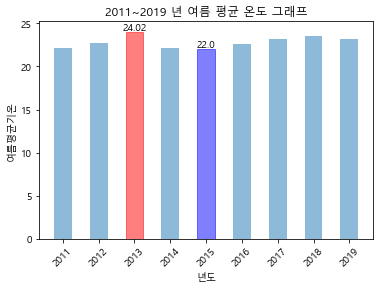

In [188]:
x_year = df2.index.tolist()
y_temp = df2.tolist()

x_pos = np.arange(len(x_year))

#numpy 모듈의 arange 함수는 반열린구간 [start, stop) 에서 step 의 크기만큼 일정하게 떨어져 있는 숫자들을 array 형태로 반환해 주는 함수다
#stop 매개변수의 값은 반드시 전달되어야 하지만 start 는 step 은 꼭 전달되지 않아도 된다. start 값이 전달되지 않았다면 0 을 기본값으로 가지며, step 값이 전달되지 않았다면 1 값을 기본값으로 갖게 된다.

bar_width =0.5

max_gu = y_temp.index(max(y_temp))
min_gu = y_temp.index(min(y_temp))

bar_list = plt.bar(x_pos, y_temp, bar_width , align='center', alpha=0.5)
plt.xticks(x_pos,x_year,rotation = 45)

bar_list[max_gu].set_color('r')
bar_list[min_gu].set_color('b')



# 막대그래프에 최대값 최소값 표시
plt.text(x_pos[max_gu], y_temp[max_gu], y_temp[max_gu],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)


plt.text(x_pos[min_gu],y_temp[min_gu], y_temp[min_gu],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)


plt.ylabel('여름평균기온')
plt.xlabel('년도')
plt.title('2011~2019 년 여름 평균 온도 그래프')
plt.show()

## 문제2) 키워드를 추출하여 워드클라우드 출력하기 

In [1]:
!pip install pandas numpy matplotlib

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mat

## 폰트 설정 : 한글 출력
mat.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# -*- coding: cp949*-

# -이터 읽어오기*-
import pandas as pd
import numpy as np

file_path = './부산광역시_업무관계자만족도조사현황_20210512.csv'
df = pd.read_csv(file_path, encoding = 'cp949')  # 데이터프레임 생성

print(df.shape)
print("------------------------------------")
print(df.info())

(1646, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업무명     1646 non-null   object 
 1   조사일     1646 non-null   object 
 2   처리상태    1646 non-null   object 
 3   조사매체    1646 non-null   object 
 4   점수      613 non-null    float64
dtypes: float64(1), object(4)
memory usage: 64.4+ KB
None


In [4]:
df.head()

,업무명,조사일,처리상태,조사매체,점수
0,품질시험의뢰-하수관로 신설(확충)사업(강변 처리구역(북구 제척지 일원))-건설본부 ...,2020-12-01,조사완료,전화,100.0
1,생곡쓰레기매립장(2-1단계) 조성공사 건설사업 관리용역,2020-12-01,조사중,전화,NaN
2,해운대소각시설 대보수사업,2020-12-01,조사중,전화,NaN
3,송정천외 2개하천 기본계획수립 및 지형도면 작성용역,2020-12-02,조사완료,전화,100.0
4,부산 미래유산 조사 연구 용역,2020-12-02,조사완료,전화,75.0


----

In [5]:
import re

# 텍스트 정제 함수 정의 - 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식 # re모듈 ^ : not  | : or + :and , '[^ ㄱ-ㅣ가-힣]+' : 한글제외 다 삭제
    result = hangul.sub('', text)
    return result

# ‘tweet_text’ 피처에 이를 적용합니다.
df['업무명_정제'] = df['업무명'].apply(lambda x: text_cleaning(x))
df.head()

,업무명,조사일,처리상태,조사매체,점수,업무명_정제
0,품질시험의뢰-하수관로 신설(확충)사업(강변 처리구역(북구 제척지 일원))-건설본부 ...,2020-12-01,조사완료,전화,100.0,품질시험의뢰하수관로 신설확충사업강변 처리구역북구 제척지 일원건설본부 토목팀
1,생곡쓰레기매립장(2-1단계) 조성공사 건설사업 관리용역,2020-12-01,조사중,전화,NaN,생곡쓰레기매립장단계 조성공사 건설사업 관리용역
2,해운대소각시설 대보수사업,2020-12-01,조사중,전화,NaN,해운대소각시설 대보수사업
3,송정천외 2개하천 기본계획수립 및 지형도면 작성용역,2020-12-02,조사완료,전화,100.0,송정천외 개하천 기본계획수립 및 지형도면 작성용역
4,부산 미래유산 조사 연구 용역,2020-12-02,조사완료,전화,75.0,부산 미래유산 조사 연구 용역


In [6]:
# 각 피처마다 말뭉치를 생성
content_corpus = "".join(df['업무명_정제'].tolist())
print(content_corpus)

품질시험의뢰하수관로 신설확충사업강변 처리구역북구 제척지 일원건설본부 토목팀생곡쓰레기매립장단계 조성공사 건설사업 관리용역해운대소각시설 대보수사업송정천외 개하천 기본계획수립 및 지형도면 작성용역부산 미래유산 조사 연구 용역 중앙대로 중앙분리화단 유지관리공사부산항 남항 재개발사업 기본구상에 관한 연구종합운동장 실내체육관 조명 개선공사차도매시장동 등 태풍피해 시설물 보수공사네버랜드사운드랜드 권병준 전 음향 컨텐츠 제작 계약의뢰품질시험의뢰남구 수영로 대연동 번지 일원 보도정비공사남구품질시험의뢰광안대로 노후 아스팔트 포장보수공사차부산시설공단품질시험의뢰우동로 번길  주변 공급관 부설공사부산도시가스품질시험의뢰낙동남로 번길  주변 공급관 부설공사강서구품질시험의뢰년 북부통합사업소 도로굴착 복구공사동래구 연제구단가계약상수도 북부통합사업소품질시험의뢰년 북부통합사업소 도로굴착 복구공사동래구 연제구단가계약상수도 북부통합사업소품질시험의뢰하남어린이집 어린이보호구역 개선사업기장군품질시험의뢰우동 백조어린이집 일원 도로정비공사건설안전시험사업소품질시험의뢰중동 경동메르빌아파트 일원 도로정비공사건설안전시험사업소품질시험의뢰망양로 범일초등학교 일원 긴급도로정비공사동구품질시험의뢰품질시험의뢰생곡쓰레기매립장단계 조성공사 건설사업 관리용역해운대소각시설 대보수사업년 전기자동차 구매 보조금 지급차 건년 전기자동차 구매 보조금 지급차 건년 전기자동차 구매 보조금 지급차 건년 전기자동차 구매 보조금 지급차 건본관 여자화장실 및 샤워실 리모델링공사제회 시장배 전국공수도선수권대회 지방보조금 교부 의뢰남북협력 분위기 조성사업 보조금 교부평화통일 문화행사 지원사업 보조금 교부폐가성소다 지정폐기물 처리용역제회 소비자의 날 기념 행사보조금 지출 의뢰년 제회 아시아콘텐츠필름마켓 시비보조금차 교부운영비화명정수장 슬러지처리장 배니지 슬러지 이송펌프 등 종 수선공사품질시험의뢰광안동 행정복지센터 일원 외 개소 도로정비공사수영구품질시험의뢰무양마을 도시계획도로소호선 개설공사기장군품질시험의뢰남항 새싹길  일원 도로정비공사영도구년 일자리 르네

In [7]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [8]:
count

Counter({'품질': 397,
         '시험': 411,
         '의뢰': 662,
         '관로': 41,
         '신설': 14,
         '확충': 9,
         '사업': 718,
         '강변': 4,
         '처리': 18,
         '구역': 19,
         '북구': 14,
         '제척': 7,
         '일원': 115,
         '건설': 277,
         '본부': 14,
         '토목': 4,
         '팀생곡': 2,
         '쓰레기': 164,
         '매립': 164,
         '단계': 169,
         '조성': 201,
         '공사': 366,
         '관리': 217,
         '용역': 330,
         '해운대': 166,
         '시설': 221,
         '보수': 207,
         '송정': 3,
         '천외': 2,
         '개': 43,
         '하천': 12,
         '기본': 15,
         '계획': 34,
         '수립': 21,
         '및': 77,
         '지형도': 2,
         '작성': 2,
         '부산': 165,
         '미래': 1,
         '유산': 1,
         '조사': 9,
         '연구': 17,
         '중앙': 15,
         '분리': 2,
         '화단': 2,
         '유지관리': 8,
         '항': 1,
         '남항': 3,
         '재개발': 2,
         '구상': 1,
         '관': 54,
         '종합': 28,
         '운

In [9]:
#한글자 키워드 제거

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'사업': 718, '의뢰': 662, '보조금': 440, '시험': 411, '품질': 397, '공사': 366, '용역': 330, '건설': 277, '교부': 266, '시설': 221, '관리': 217, '보수': 207, '조성': 201, '지급': 201, '단계': 169, '해운대': 166, '부산': 165, '쓰레기': 164, '매립': 164, '도로': 144, '지원': 139, '생곡': 117, '일원': 115, '운영': 109, '년도': 92, '정비공': 89, '구매': 89, '지출': 84, '센터': 83, '단체': 82, '전기자동차': 80, '건년': 77, '민간': 73, '노후': 72, '설치': 65, '번지': 56, '시비': 53, '유차': 52, '조기': 51, '폐차': 51, '분기': 50, '부산광역시': 48, '주변': 47, '개설': 44, '부설': 43, '기장군': 43, '비영리': 42, '관로': 41, '강서구': 40, '정비': 40, '복구': 39, '개선': 38, '계약': 38, '지역': 38, '번길': 37, '공급': 37, '위탁': 36, '안전': 35, '장애인': 35, '계획': 34, '도시가스': 34, '도시': 34, '산업': 33, '영도구': 30, '종합': 28, '건의': 28, '포장': 27, '가계약': 27, '청년': 27, '설계': 26, '건립': 25, '교육': 25, '활동': 25, '상반기': 25, '마을': 24, '실시': 24, '어린이': 23, '등록': 23, '공통': 23, '수영구': 22, '민원': 22, '공원': 22, '급식': 22, '수립': 21, '초등학교': 21, '차차': 21, '공고': 21, '해운대구': 20, '사회': 20, '구역': 19, '굴착': 19, '환경': 19, '노인': 19, '하수': 19, '처

In [10]:
korean_stopwords_path = "../data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

In [11]:
# 불용어를 추가
add_stopwords = ['품질시험의뢰', '지급', '교부']
for stopword in add_stopwords:
    stopwords.append(stopword)

In [12]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'사업': 718, '의뢰': 662, '보조금': 440, '시험': 411, '품질': 397, '공사': 366, '용역': 330, '건설': 277, '시설': 221, '관리': 217, '보수': 207, '조성': 201, '단계': 169, '해운대': 166, '부산': 165, '쓰레기': 164, '매립': 164, '도로': 144, '지원': 139, '생곡': 117, '일원': 115, '운영': 109, '년도': 92, '정비공': 89, '구매': 89, '지출': 84, '센터': 83, '단체': 82, '전기자동차': 80, '건년': 77, '민간': 73, '노후': 72, '설치': 65, '번지': 56, '시비': 53, '유차': 52, '조기': 51, '폐차': 51, '분기': 50, '부산광역시': 48, '주변': 47, '개설': 44, '부설': 43, '기장군': 43, '비영리': 42, '관로': 41, '강서구': 40, '정비': 40, '복구': 39, '개선': 38, '계약': 38, '지역': 38, '번길': 37, '공급': 37, '위탁': 36, '안전': 35, '장애인': 35, '계획': 34, '도시가스': 34, '도시': 34, '산업': 33, '영도구': 30, '종합': 28, '건의': 28, '포장': 27, '가계약': 27, '청년': 27, '설계': 26, '건립': 25, '교육': 25, '활동': 25, '상반기': 25, '마을': 24, '실시': 24, '어린이': 23, '등록': 23, '공통': 23, '수영구': 22, '민원': 22, '공원': 22, '급식': 22, '수립': 21, '초등학교': 21, '차차': 21, '공고': 21, '해운대구': 20, '사회': 20, '구역': 19, '굴착': 19, '환경': 19, '노인': 19, '하수': 19, '처리': 18, '피해': 18, '보호'

In [13]:
!pip install pytagcloud pygame simplejson

In [14]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


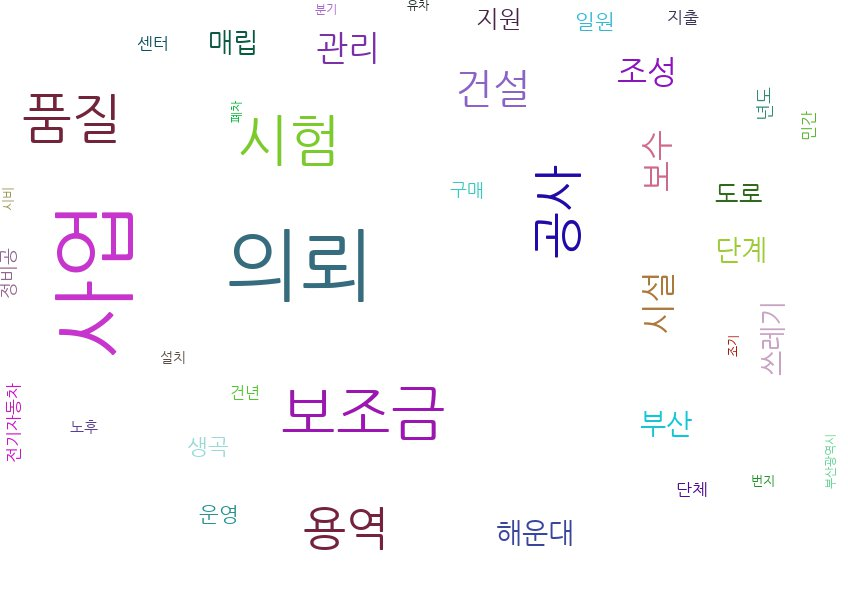

In [15]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')